In [ ]:
# Trying on one file first to see if everything is working properly

import numpy as np
import os
import time
import tracemalloc

# Define paths for input and output folders
input_folder = 'rest_AP_run01'
output_base_folder = 'full FC matrices'
output_folder = os.path.join(output_base_folder, os.path.basename(input_folder))

# Ensure the output directory exists
os.makedirs(output_folder, exist_ok=True)

# Function to compute FC matrix and save it, with performance measurement
def compute_and_save_fc_matrix(file_path):
    # Load the parcellated time series data
    time_series_data = np.loadtxt(file_path)
    
    # Compute the FC matrix using Pearson correlation
    fc_matrix = np.corrcoef(time_series_data, rowvar=False)
    
    # Extract the correct participant ID from the file name
    participant_id = os.path.splitext(os.path.basename(file_path))[0].split('_')[0:2]
    participant_id = '_'.join(participant_id)  # Join the first two segments for the correct ID
    output_file_name = f"{participant_id}_full_FC_matrix.npy"
    output_file_path = os.path.join(output_folder, output_file_name)
    
    # Save the FC matrix as a .npy file
    np.save(output_file_path, fc_matrix)
    print(f"FC matrix for {file_path} saved to {output_file_path}")

# Function to measure time and memory usage
def measure_performance():
    start_time = time.time()  # Start time measurement
    tracemalloc.start()  # Start tracking memory usage
    
    # Specify the exact file path
    sample_file = os.path.join(input_folder, 'NDAR_INVAG023WG3_ts_446_AP_run01_gsr.txt')
    compute_and_save_fc_matrix(sample_file)
    
    # Stop time and memory measurement
    elapsed_time = time.time() - start_time
    current, peak_memory = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    
    # Display results
    print(f"\nPerformance Summary:")
    print(f"Time taken: {elapsed_time:.2f} seconds")
    print(f"Peak memory usage: {peak_memory / 1024:.2f} KB")
    print("Total FC matrices computed: 1")

# Run the performance measurement
measure_performance()


FC matrix for rest_AP_run01\NDAR_INVAG023WG3_ts_446_AP_run01_gsr.txt saved to full FC matrices\rest_AP_run01\NDAR_INVAG023WG3_full_FC_matrix.npy

Performance Summary:
Time taken: 0.04 seconds
Peak memory usage: 5411.37 KB
Total FC matrices computed: 1


In [ ]:
import numpy as np
import os
import time
import tracemalloc

# Define the base path for the input and output folders
output_base_folder = 'full FC matrices'

# Function to compute FC matrix and save it in float32 format with performance measurement
def compute_and_save_fc_matrix(file_path):
    # Load the parcellated time series data
    time_series_data = np.loadtxt(file_path)
    
    # Compute the FC matrix using Pearson correlation
    fc_matrix = np.corrcoef(time_series_data, rowvar=False).astype(np.float32)  # Convert to float32 for limiting comput expensiveness

    # Extract the participant ID from the file name
    filename = os.path.basename(file_path)
    participant_id = '_'.join(filename.split('_')[:2])  # Join first two parts for correct ID

    # Determine output folder based on input folder name
    input_folder_name = os.path.basename(os.path.dirname(file_path))
    output_folder = os.path.join(output_base_folder, input_folder_name)
    os.makedirs(output_folder, exist_ok=True)  # Ensure output directory exists
    
    # Create the output file name and path
    output_file_name = f"{participant_id}_full_FC_matrix.npy"
    output_file_path = os.path.join(output_folder, output_file_name)
    
    # Save the FC matrix as a .npy file in float32 format
    np.save(output_file_path, fc_matrix)
    print(f"FC matrix for {file_path} saved to {output_file_path}")

# Function to measure time and memory usage for a given file
def measure_performance(file_path):
    start_time = time.time()  # Start time measurement
    tracemalloc.start()  # Start tracking memory usage
    
    # Run the FC matrix computation and save function
    compute_and_save_fc_matrix(file_path)
    
    # Stop time and memory measurement
    elapsed_time = time.time() - start_time
    current, peak_memory = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    
    # Display performance results
    print(f"\nPerformance Summary:")
    print(f"Time taken: {elapsed_time:.2f} seconds")
    print(f"Peak memory usage: {peak_memory / 1024:.2f} KB")
    print("Total FC matrices computed: 1")

# Example usage with different file names
sample_files = [
    'rest_AP_run01/NDAR_INVAG023WG3_ts_446_AP_run01_gsr.txt']

# Run the performance measurement for each sample file
for sample_file in sample_files:
    measure_performance(sample_file)


FC matrix for rest_AP_run01/NDAR_INVAG023WG3_ts_446_AP_run01_gsr.txt saved to full FC matrices\rest_AP_run01\NDAR_INVAG023WG3_full_FC_matrix.npy

Performance Summary:
Time taken: 0.05 seconds
Peak memory usage: 5555.95 KB
Total FC matrices computed: 1


In [ ]:
# Code block above works correctly for:
# rest_AP_run01


In [19]:
import numpy as np
import os
import time
import tracemalloc

# Define the base path for the output folders
output_base_folder = 'full FC matrices'

# Function to compute FC matrix and save it in float32 format
def compute_and_save_fc_matrix(file_path, output_folder):
    # Load the parcellated time series data
    time_series_data = np.loadtxt(file_path)
    
    # Ensure the data is shaped with regions as rows, time points as columns
    if time_series_data.shape[0] != 446:
        time_series_data = time_series_data.T  # Transpose if regions are columns
    
    # Compute the FC matrix using Pearson correlation (regions as rows, time points as columns)
    fc_matrix = np.corrcoef(time_series_data).astype(np.float32)  # Convert to float32

    # Extract the participant ID from the file name
    filename = os.path.basename(file_path)
    participant_id = '_'.join(filename.split('_')[:2])  # Join the first two segments for correct ID
    
    # Create the output file name and path
    output_file_name = f"{participant_id}_full_FC_matrix.npy"
    output_file_path = os.path.join(output_folder, output_file_name)
    
    # Save the FC matrix as a .npy file in float32 format
    np.save(output_file_path, fc_matrix)
    print(f"FC matrix for {file_path} saved to {output_file_path}")

# Function to process all files in a given folder and measure performance
def process_folder(input_folder_name):
    # Define paths for input and output folders
    input_folder = input_folder_name
    output_folder = os.path.join(output_base_folder, os.path.basename(input_folder))
    os.makedirs(output_folder, exist_ok=True)  # Ensure output directory exists

    # Start time and memory measurement for the whole folder
    start_time = time.time()
    tracemalloc.start()

    # Count the number of FC matrices computed
    fc_matrix_count = 0

    # Process each file in the specified folder
    for file_name in os.listdir(input_folder):
        file_path = os.path.join(input_folder, file_name)
        
        # Only process files that match the expected pattern (skip non-data files)
        if file_name.endswith('_gsr.txt') and file_name.startswith('NDAR'):
            compute_and_save_fc_matrix(file_path, output_folder)
            fc_matrix_count += 1

    # Stop time and memory measurement
    elapsed_time = time.time() - start_time
    current, peak_memory = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    # Display performance results
    print(f"\nPerformance Summary for folder '{input_folder_name}':")
    print(f"Time taken: {elapsed_time:.2f} seconds")
    print(f"Peak memory usage: {peak_memory / 1024:.2f} KB")
    print(f"Total FC matrices computed: {fc_matrix_count}")

# Example usage: Process all files in a specified folder
process_folder('rest_AP_run01')


FC matrix for rest_AP_run01\NDAR_INVAG023WG3_ts_446_AP_run01_gsr.txt saved to full FC matrices\rest_AP_run01\NDAR_INVAG023WG3_full_FC_matrix.npy
FC matrix for rest_AP_run01\NDAR_INVAG388HJL_ts_446_AP_run01_gsr.txt saved to full FC matrices\rest_AP_run01\NDAR_INVAG388HJL_full_FC_matrix.npy
FC matrix for rest_AP_run01\NDAR_INVAG900RVD_ts_446_AP_run01_gsr.txt saved to full FC matrices\rest_AP_run01\NDAR_INVAG900RVD_full_FC_matrix.npy
FC matrix for rest_AP_run01\NDAR_INVAH529JMM_ts_446_AP_run01_gsr.txt saved to full FC matrices\rest_AP_run01\NDAR_INVAH529JMM_full_FC_matrix.npy
FC matrix for rest_AP_run01\NDAR_INVAK834VNU_ts_446_AP_run01_gsr.txt saved to full FC matrices\rest_AP_run01\NDAR_INVAK834VNU_full_FC_matrix.npy
FC matrix for rest_AP_run01\NDAR_INVAL101MH2_ts_446_AP_run01_gsr.txt saved to full FC matrices\rest_AP_run01\NDAR_INVAL101MH2_full_FC_matrix.npy
FC matrix for rest_AP_run01\NDAR_INVAP729WCD_ts_446_AP_run01_gsr.txt saved to full FC matrices\rest_AP_run01\NDAR_INVAP729WCD_full

In [21]:
# Load a FC matrix file to see shape etc.

import numpy as np
fc_matrix = np.load('full FC matrices/rest_AP_run01/NDAR_INVAG023WG3_full_FC_matrix.npy')

# Set NumPy print options for non-scientific notation with desired precision
np.set_printoptions(suppress=True, precision=8)

# Display the shape and content of the loaded matrix to verify
print("Shape of FC matrix:", fc_matrix.shape)
print("FC matrix contents:\n", fc_matrix)

Shape of FC matrix: (446, 446)
FC matrix contents:
 [[ 1.          0.5043199   0.6352432  ... -0.27689424 -0.37254497
  -0.22499323]
 [ 0.5043199   1.          0.42737982 ... -0.24917708 -0.37887785
  -0.38664678]
 [ 0.6352432   0.42737982  1.         ... -0.23383333 -0.15187143
  -0.00007935]
 ...
 [-0.27689424 -0.24917708 -0.23383333 ...  1.          0.48304635
   0.37827924]
 [-0.37254497 -0.37887785 -0.15187143 ...  0.48304635  1.
   0.75742906]
 [-0.22499323 -0.38664678 -0.00007935 ...  0.37827924  0.75742906
   1.        ]]


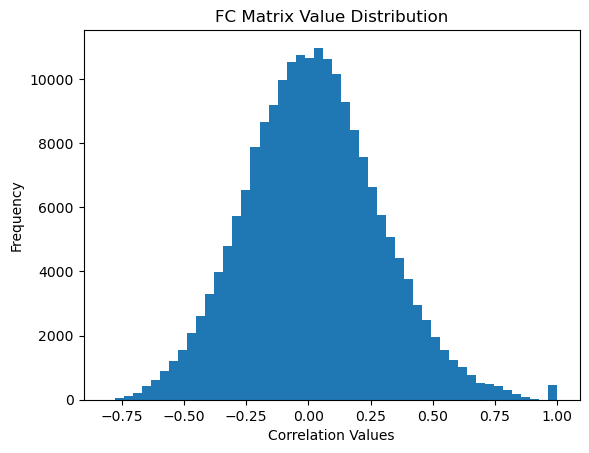

In [24]:
assert np.allclose(fc_matrix, fc_matrix.T), "FC matrix is not symmetric!"
assert np.min(fc_matrix) >= -1 and np.max(fc_matrix) <= 1, "FC matrix values are out of expected range!"

import matplotlib.pyplot as plt
plt.hist(fc_matrix.flatten(), bins=50)
plt.title("FC Matrix Value Distribution")
plt.xlabel("Correlation Values")
plt.ylabel("Frequency")
plt.show()




In [ ]:
# Now let's proceed with computing all the FC matrices of the other runs
import numpy as np
import os
import time
import tracemalloc

# Define the base path for the output folders
output_base_folder = 'full FC matrices'

# Function to compute FC matrix and save it in float32 format
def compute_and_save_fc_matrix(file_path, output_folder):
    # Load the parcellated time series data
    time_series_data = np.loadtxt(file_path)
    
    # Ensure the data is shaped with regions as rows, time points as columns
    if time_series_data.shape[0] != 446:
        time_series_data = time_series_data.T  # Transpose if regions are columns
    
    # Compute the FC matrix using Pearson correlation (regions as rows, time points as columns)
    fc_matrix = np.corrcoef(time_series_data).astype(np.float32)  # Convert to float32

    # Extract the participant ID from the file name
    filename = os.path.basename(file_path)
    participant_id = '_'.join(filename.split('_')[:2])  # Join the first two segments for correct ID
    
    # Create the output file name and path
    output_file_name = f"{participant_id}_full_FC_matrix.npy"
    output_file_path = os.path.join(output_folder, output_file_name)
    
    # Save the FC matrix as a .npy file in float32 format
    np.save(output_file_path, fc_matrix)
    print(f"FC matrix for {file_path} saved to {output_file_path}")

# Function to process all files in a given folder and measure performance
def process_folder(input_folder_name):
    # Define paths for input and output folders
    input_folder = input_folder_name
    output_folder = os.path.join(output_base_folder, os.path.basename(input_folder))
    os.makedirs(output_folder, exist_ok=True)  # Ensure output directory exists

    # Start time and memory measurement for the whole folder
    start_time = time.time()
    tracemalloc.start()

    # Count the number of FC matrices computed
    fc_matrix_count = 0

    # Process each file in the specified folder
    for file_name in os.listdir(input_folder):
        file_path = os.path.join(input_folder, file_name)
        
        # Only process files that match the expected pattern (skip non-data files)
        if file_name.endswith('_gsr.txt') and file_name.startswith('NDAR'):
            compute_and_save_fc_matrix(file_path, output_folder)
            fc_matrix_count += 1

    # Stop time and memory measurement
    elapsed_time = time.time() - start_time
    current, peak_memory = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    # Display performance results
    print(f"\nPerformance Summary for folder '{input_folder_name}':")
    print(f"Time taken: {elapsed_time:.2f} seconds")
    print(f"Peak memory usage: {peak_memory / 1024:.2f} KB")
    print(f"Total FC matrices computed: {fc_matrix_count}")

# Process all files in a specified folder
process_folder('stroop_PA_run01')


FC matrix for stroop_PA_run01\NDAR_INVAG023WG3_ts_446_PA_run01_gsr.txt saved to full FC matrices\stroop_PA_run01\NDAR_INVAG023WG3_full_FC_matrix.npy
FC matrix for stroop_PA_run01\NDAR_INVAG388HJL_ts_446_PA_run01_gsr.txt saved to full FC matrices\stroop_PA_run01\NDAR_INVAG388HJL_full_FC_matrix.npy
FC matrix for stroop_PA_run01\NDAR_INVAG900RVD_ts_446_PA_run01_gsr.txt saved to full FC matrices\stroop_PA_run01\NDAR_INVAG900RVD_full_FC_matrix.npy
FC matrix for stroop_PA_run01\NDAR_INVAH529JMM_ts_446_PA_run01_gsr.txt saved to full FC matrices\stroop_PA_run01\NDAR_INVAH529JMM_full_FC_matrix.npy
FC matrix for stroop_PA_run01\NDAR_INVAK834VNU_ts_446_PA_run01_gsr.txt saved to full FC matrices\stroop_PA_run01\NDAR_INVAK834VNU_full_FC_matrix.npy
FC matrix for stroop_PA_run01\NDAR_INVAL101MH2_ts_446_PA_run01_gsr.txt saved to full FC matrices\stroop_PA_run01\NDAR_INVAL101MH2_full_FC_matrix.npy
FC matrix for stroop_PA_run01\NDAR_INVAP729WCD_ts_446_PA_run01_gsr.txt saved to full FC matrices\stroop_PA